## Name and surname:  Gabriel Martins de Andrade

# Practical Session 1 : (Histogram manipulation), Fourier domain, sub-sampling, linear filtering
The goal of this first practical session is to understand and try out python functions for image processing, and to get acquainted with image processing libraries, especially scikit-image. We will first go over how to visualize an image and its histogram. Then, we will try to understand the frequential content of an image thanks to the two-dimensional Fourier transform. Finally we will try out different linear filterings of our images.

You have to fill the notebook and answer to the question in the text cell each time there is the word **Answer**.

## Image and histogram visualization
In order to visualize images and their histograms, we will use basic functions of scikit-image, numpy, and matplotlib. You can either use our images, or images that are stored in your Google Drive.

To download our images, execute the following command :

In [ ]:
#Dowmloading images
!wget https://perso.telecom-paristech.fr/tupin/cours/imagesTP1.zip
!unzip -qq imagesTP1.zip
!rm imagesTP1.zip
!rm -rf __MACOSX

--2022-11-15 12:38:58--  https://perso.telecom-paristech.fr/tupin/cours/imagesTP1.zip
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5236007 (5.0M) [application/zip]
Saving to: ‘imagesTP1.zip’

imagesTP1.zip       100%[===================>]   4.99M  6.10MB/s    in 0.8s    

2022-11-15 12:39:00 (6.10 MB/s) - ‘imagesTP1.zip’ saved [5236007/5236007]



The image should now appear in the "Files" menu on the left.To use the files stored in your google Drive, you need to click the "Mount Drive" button in the Files menu. Then, you will need to modify the path variable in the code, with the path name of your image in the drive Folder.

Here are the imports you should do :

In [ ]:
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import numpy.fft as fft
from scipy import signal

### Image visualisation
To visualize and load an image, you will use the function imread from skio. You can either load it in RGB or in greyscale.

rgb image shape : (1200, 1920, 3)


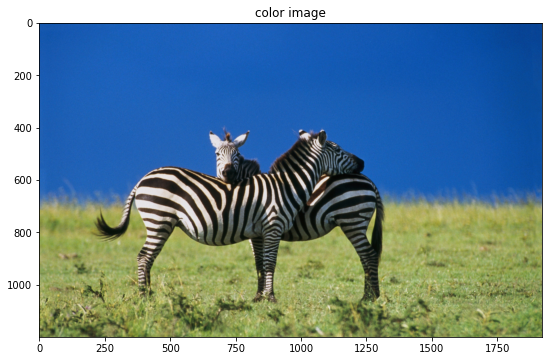

gray image shape : (512, 512)


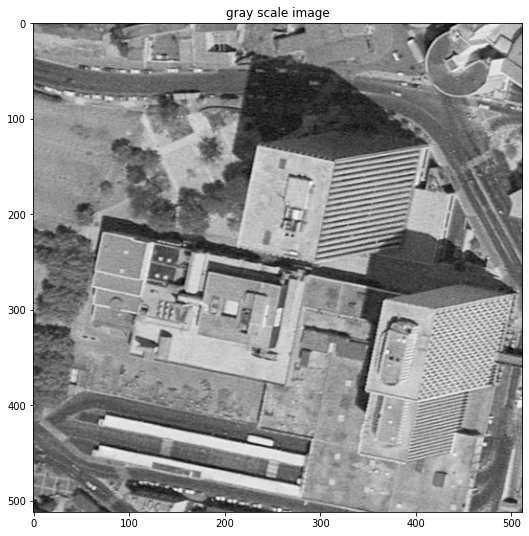

In [ ]:
path = "imagesTP1/zebres.tif"
image_rgb = skio.imread(path)
print("rgb image shape : "+str(image_rgb.shape))
plt.rcParams['figure.figsize'] = [9, 9] #control the size of the figure
plt.title("color image")
plt.imshow(image_rgb)
plt.show()

plt.rcParams['figure.figsize'] = [9, 9] #control the size of the figure
path = "imagesTP1/montreuil.tif"
image_gs = skio.imread(path,as_gray=True) #the default value for as_gray is False
print("gray image shape : "+str(image_gs.shape))
plt.title("gray scale image")
plt.imshow(image_gs, cmap = "gray")
plt.show()

### Histogram visualization
Multiple functions already exist to create an histogram. The histogram shows the distribution of the gray-levels or the colors of an image (gray-level in abscissa and number of pixels having this gray level in ordinate). You will see this topic in depth in the next course. Here we will just use the skimage.exposure.histogram function(), which takes as input the image and the number of bins of the histogram. It returns a couple of arrays of the form (height, value). We will use the plt.bar() function to plot the histogram.

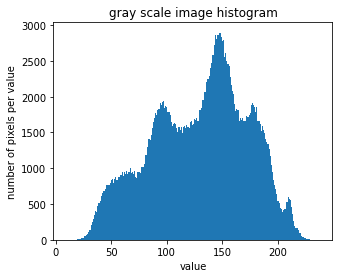

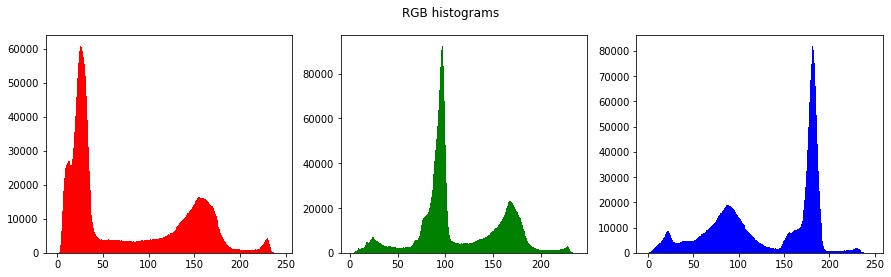

In [ ]:
## grayscale histogram
img = image_gs
nbins = 256
histogram = skimage.exposure.histogram(image_gs, nbins)
plt.figure(figsize=(5,4))
plt.title("gray scale image histogram")
plt.xlabel("value")
plt.ylabel("number of pixels per value")
plt.bar(histogram[1],histogram[0], width = 1)
plt.show()

### color histograms
img = image_rgb
nbins = 255
red_histogram = skimage.exposure.histogram(image_rgb[...,0], nbins)
green_histogram = skimage.exposure.histogram(image_rgb[...,1], nbins)
blue_histogram = skimage.exposure.histogram(image_rgb[...,2], nbins)
fig, axs = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle("RGB histograms")
axs[0].bar(red_histogram[1],red_histogram[0], width = 1, color = "red")
axs[1].bar(green_histogram[1],green_histogram[0], width = 1, color = "green")
axs[2].bar(blue_histogram[1],blue_histogram[0], width = 1, color = "blue")
plt.show()


## Fourier Domain
The Fourier Transform of an image allows us to analyze the frequential content of an image, by going from the spatial domain to the frequential domain.
To compute the 2D Fourier transform of a grayscale image, we will use the fft2() function of the numpy.fft library.

To display the Fourier transform centered on the (0,0) component, we will use
the fft.fftshift() to the Fourier transform.

In [ ]:
# complete this cell to compute the FT of img
img = skio.imread("imagesTP1/montreuil.tif")
image_fft = np.fft.fft2(img)
image_fft_shift = np.fft.fftshift(image_fft)

Let's visualize the modulus of the Fourier transform by applying the log(abs(x)+0.1) to the FFT. (Remember, the Fourier transform is a complex number!)
Compare the result without using the log transform.

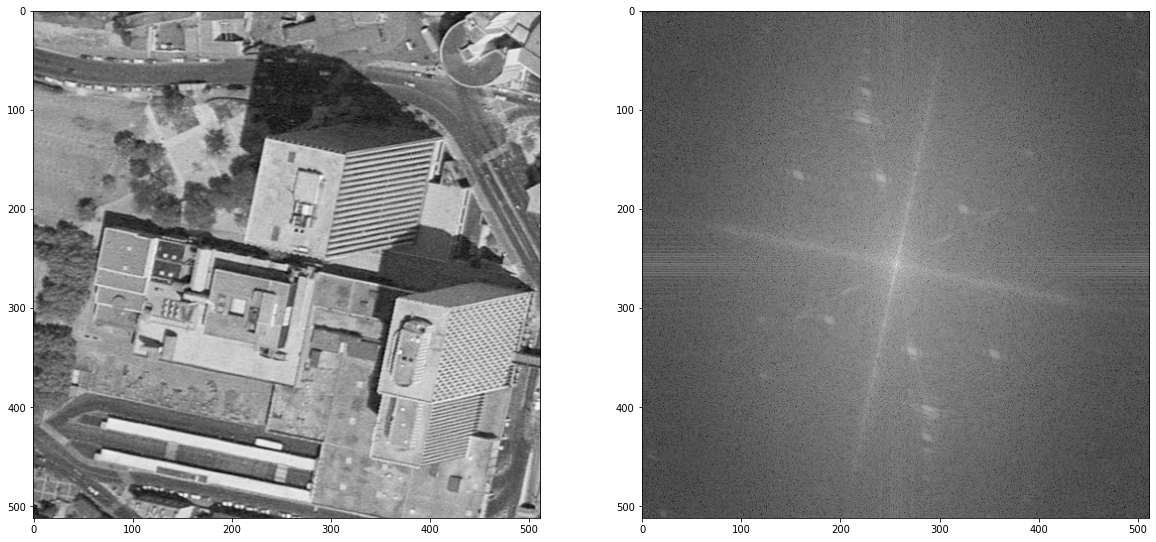

In [ ]:
# Visualize the Fourier transform
modfft = np.log(np.abs(image_fft_shift)+0.1)

fig, axs = plt.subplots(1, 2, figsize=(20,20))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(modfft, cmap='gray')
plt.show()

Questions :
- **Q**: why is important to visualize the logarithm of the Fourier Transform?
- **Answer** : Because we have a wide range of values, and the peak is way bigger than the lower points, so we need to scale to be able to visualize details that came from less significant sources than the main peak.
- **Q** Explain the different lines and peaks in the FFT in relation to the image content.
- **Answer** : We can observe in the original image a lot of straight lines representing the border of the buildings and their shadows. Those lines are converted in orthogonal lines when doing the FFT, what explains the straight lines we observe in the diagonal in the second image. The bright spots may be a result from repeating patterns, as in the windows of the building.

Let us look at the phase of the image.


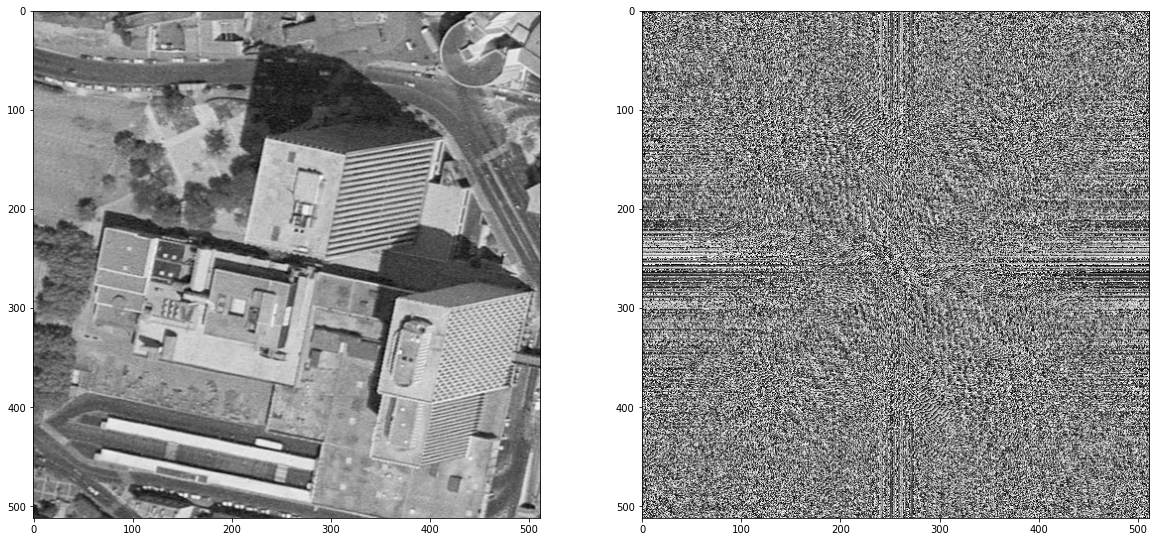

In [ ]:
# we use np.angle to retrieve the complex argument
phifft = np.angle(image_fft_shift)

fig, axs = plt.subplots(1, 2, figsize=(20,20))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(phifft, cmap = "gray")
plt.show()

- **Q** : Can we easily interpret something from this image?
- **Answer**: No


To better understand the role of the phase image, let us invert modulus and phase of the Fourier transform of two images. For instance use "chapeau.tif" and "house.tif" to create new images with mixed spectrum (phase of one and amplitude of the other).

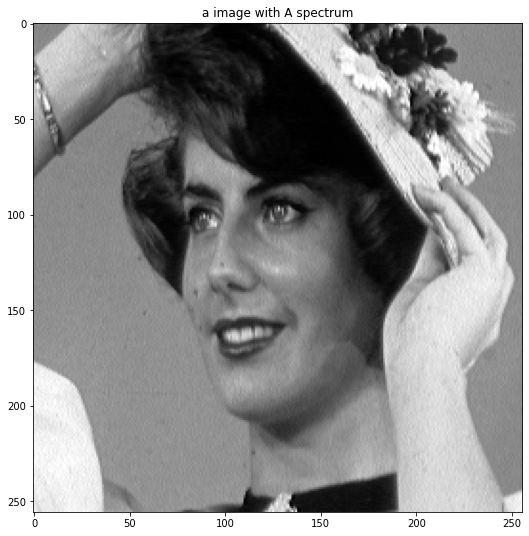

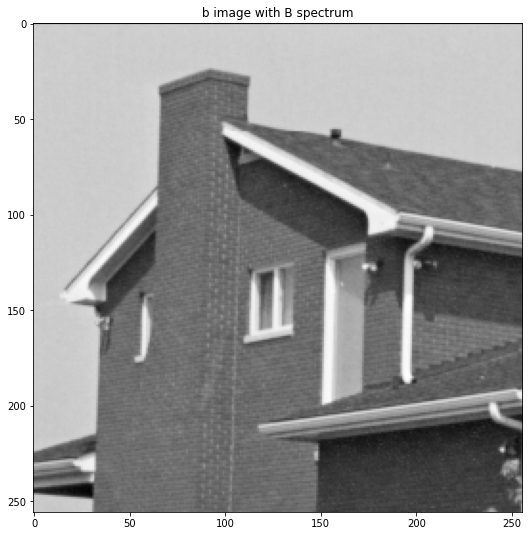

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


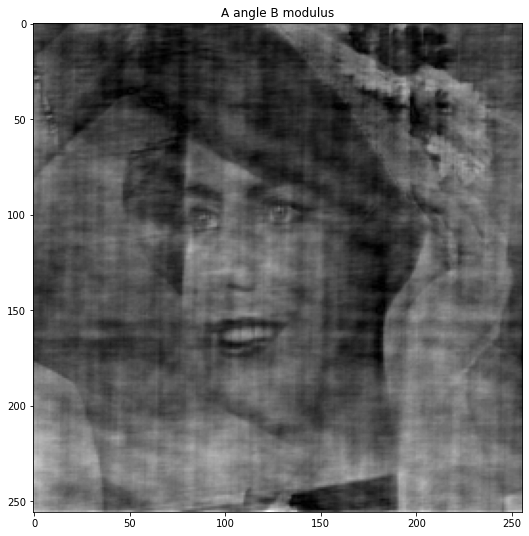

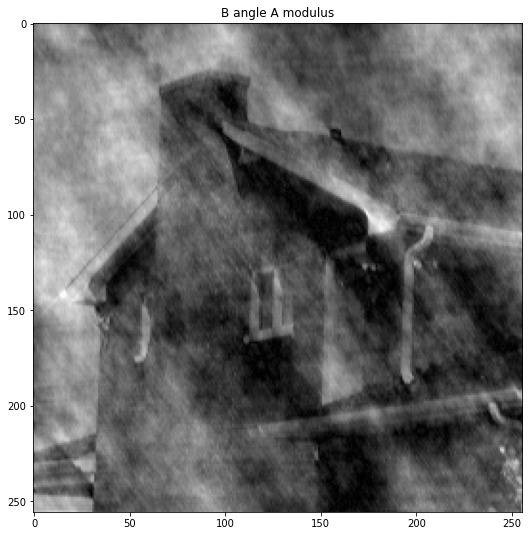

In [ ]:
# analysis of the phase spectrum information
a=skio.imread("imagesTP1/chapeau.tif")
b=skio.imread("imagesTP1/maison.tif")
plt.title(" a image with A spectrum ")
plt.imshow(a, cmap = "gray")
plt.show()
plt.title(" b image with B spectrum ")
plt.imshow(b, cmap = "gray")
plt.show()

A=fft.fft2(a); B=fft.fft2(b);
j=np.complex(0,1)
# create a new Fourier transform by mixing phase and modulus of the Fourier transforms
# transformation keeping the A angle and B modulus
Ap= np.exp(j*np.angle(A))*abs(B)
# transformation keeping the B angle and A modulus
Bp= np.exp(j*np.angle(B))*abs(A)
#Going back to the image domain (use ifft2 and real part)
ap= np.fft.ifft2(Ap)
plt.title("A angle B modulus")
plt.imshow(abs(ap), cmap = "gray");
plt.show()
#Going back to the image domain (use ifft2 and real part)
bp=np.fft.ifft2(Bp)
plt.title("B angle A modulus")
plt.imshow(abs(bp),cmap = "gray");
plt.show()

- **Q** : In which image can you recognize the content of the original image ?
- **Answer**: We can recognize the images based on the phase we used for the plot, so in the first modified image we can recognize the face of the woman, as the shape is recognizable, but the color distribution is weird. The same can be said about the house.



Another experiment is the modification of the phase of the Fourier transform on a stationary image (almost invariant content by translation), like a texture image. Take the "bois.tif" (or an image with a texture like "strawmat" or "skin")image and modify the phase of the Fourier transform to replace it by a random value between $[-\pi;\pi]$. Do the same experiment with an image like "maison".

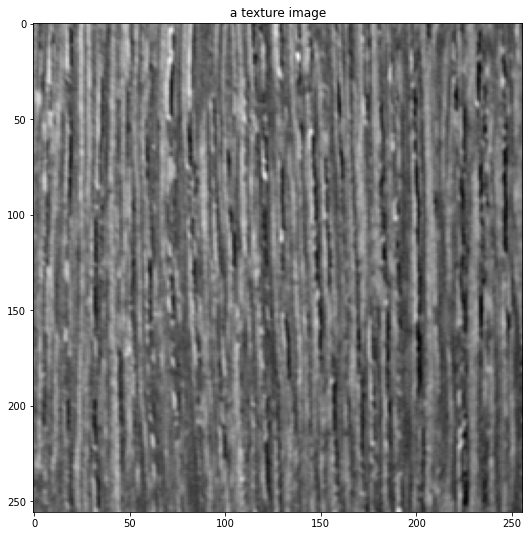

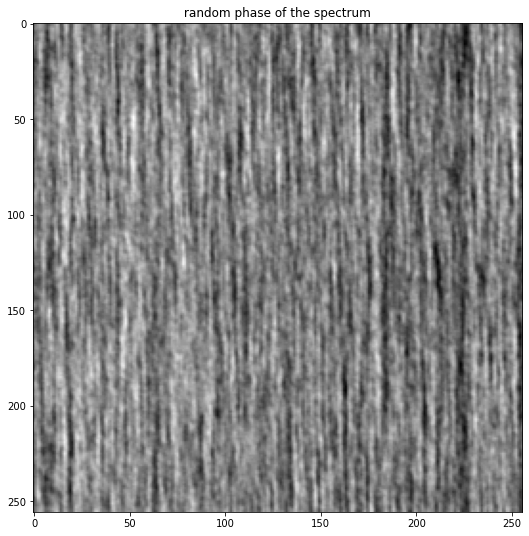

In [ ]:
#texture synthesis using random phase
a=skio.imread("imagesTP1/bois.tif")
(m,n)=a.shape
plt.title(" a texture image ")
plt.imshow(a, cmap = "gray");
plt.show()

#compute the FFT of a
A=np.fft.fft2(a)
#compute a random image with values uniformly drawn between 0 and 2pi
b=np.random.random(A.shape)
b = b*2*np.pi
#compute the new spectrum
C=abs(A)*np.exp(j*b)
#compute the new image
c= np.fft.ifft2(C)
# visualization of the new image
plt.title(" random phase of the spectrum ")
plt.imshow(np.real(c), cmap = "gray");
plt.show()


- **Q** : What is the influence of the random phase on the synthetized image ?
- **Answer**: The "bois" image was very simmilar, we could see a difference in the pattern if we look at both at the same time, but if we look one at a time, it seems like the same image. For the "maison" image, we could not recognize nothing from the original image.

### Sub-sampling an image
Images can be very large and thus use a lot of memory. It is sometimes needed to smallen those images using a sub-sampling technique. However, when done unproperly, the sub-sampled image can present artifacts. Thanks to the Fourier transform, we will understand what is the underlying problem.

image shape : (256, 256)
subsampled image shape : (128, 128)


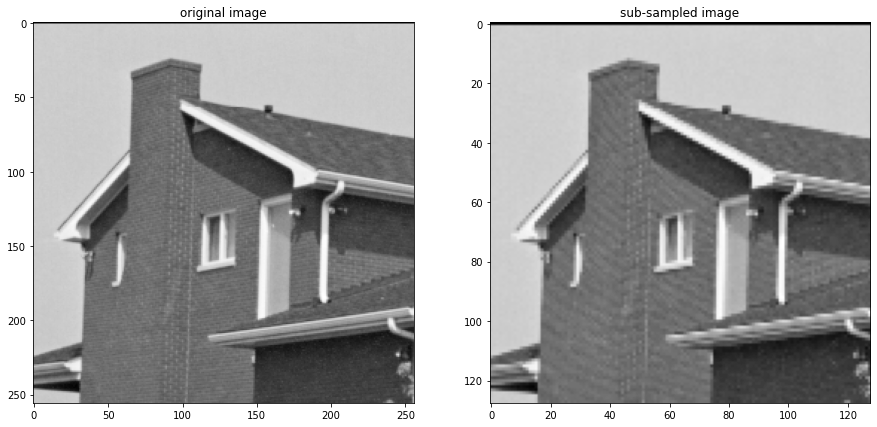

In [ ]:
# subsampling the image by a factor of 2 in each direction
img=skio.imread("imagesTP1/maison.tif")
nlines=np.shape(img)[0]
ncolumns=np.shape(img)[1]
img_subsampled=img[0:nlines:2,0:ncolumns:2]

print("image shape : "+str(img.shape))
print("subsampled image shape : "+str(img_subsampled.shape))

#visualize the images
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("original image")
axs[1].imshow(img_subsampled, cmap='gray')
axs[1].set_title("sub-sampled image")
plt.show()


- **Q**: Describe the visual artifacts you see in the sub-sampled image
- **Answer** : In the new image we see straight lines that weren't in the original one, besides that we lost a couple details, as the lines between bricks, which can hardly be seen in the new image. So the new image is noisy.


Let's compare the Fourier Transform of the subsampled image to the one of the original image:

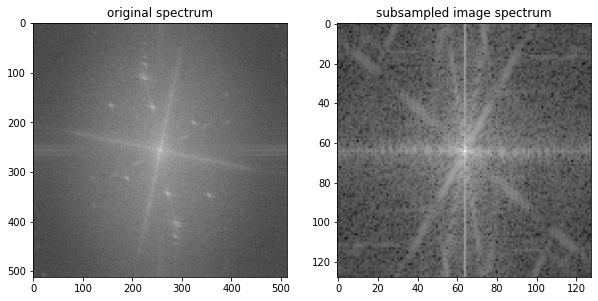

In [ ]:
##compute the modulus of the subsampled image
modfft_sub = np.log(abs(np.fft.fftshift(np.fft.fft2(img_subsampled))+0.1))


##visualize the two images
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(modfft, cmap='gray')
axs[0].set_title("original spectrum")
axs[1].imshow(modfft_sub, cmap='gray')
axs[1].set_title("subsampled image spectrum")
plt.show()

- **Q** : What is the phenomenon we observe ? How can you explain it ?
- **Answer** : We observe the overlap of the patterns in the Fourrier domain. So we are not picking enough samples to be able to identify the orientation and periodicity of the periodical patterns present in the original image.


- **Q** : Can you think of a solution to solve this problem ?
- **Answer** : We can apply a linear filter to get a image with better quality, and the best filter would be a low-pass, because the noise we gained from sub-sampling is present mainly in high frequencies.

## Linear Filtering
### Low pass Filtering

In order to smooth or to denoise an image, a very simple way is to apply a local mean filtering. In order to do that, we would convolve the image with a uniform kernel :
$$k = \frac{1}{25}\times\mathbb{1}_{(5,5)}$$

$$I_{smooth} = k*I$$

Let's build this filter and observe its Fourier transform, in a larger image. Create a binary image of size (512,512) with the filter at its center, and visualize its Fourier Transform.

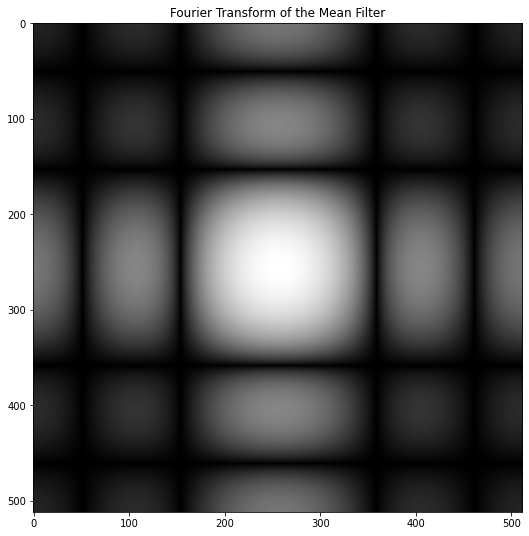

In [ ]:
##define the kernel (mean filter)
kernel = np.ones((5,5), dtype = np.float32)/25
##introduce the kernel in the middle of an image of zeros with the original size
larger_image = np.zeros((512,512))
larger_image[254:259,254:259] = kernel
kernel_fft = np.log(abs(np.fft.fftshift(np.fft.fft2(larger_image)))+0.1)
plt.title("Fourier Transform of the Mean Filter")
plt.imshow(kernel_fft, cmap = "gray")
plt.show()

- **Q**: Does that image matches to your prediction ?
- **Answer**: Yes, because it should be a low-pass filter, and as the central regions are more white in the print above, we are filtering high-frequency terms.



Let's apply this filter to the image using the scipy.signal.convolve2d() function.

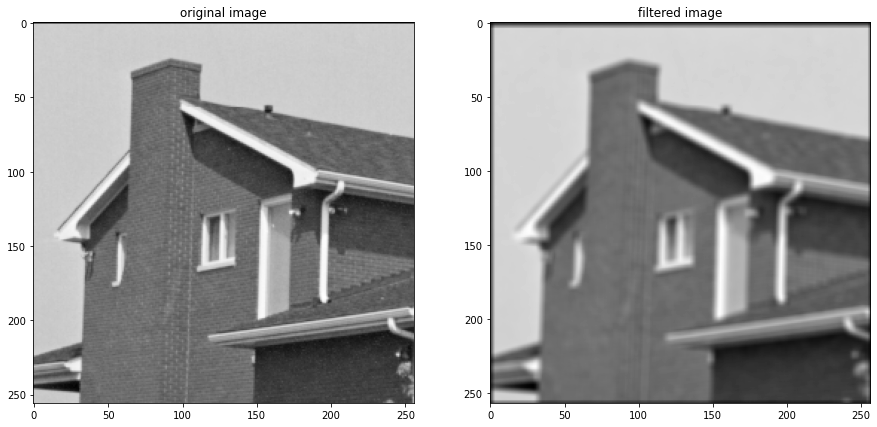

In [ ]:
from scipy.signal import convolve2d
# filtered image (use convolve2D and mode="valid")
img_filtered = signal.convolve2d(img,larger_image ,mode="valid")
img_subsampled2=img_filtered[0:nlines:2,0:ncolumns:2]

#visualize images
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("original image")
axs[1].imshow(abs(img_filtered), cmap='gray')
axs[1].set_title("filtered image")
plt.show()

- **Q**: What is the aspect of this image ?
- **Answer**: Blurry edges, and the original image details cannot be seen to well, as the lines between bricks.


Let's visualize the FFT of the filtered image.

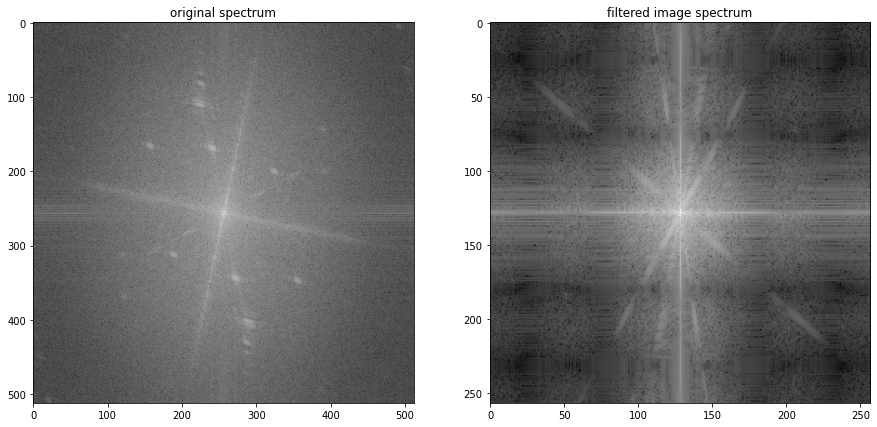

In [ ]:
##compute the modulus of the filtered image
modfft_f = np.log(abs(np.fft.fftshift(np.fft.fft2(img_filtered)))+0.1)

##visualize the two images
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(modfft, cmap='gray')
axs[0].set_title("original spectrum")
axs[1].imshow(modfft_f, cmap='gray')
axs[1].set_title("filtered image spectrum")
plt.show()

- **Q** : Does this image follows its predicted value ? (Explain your reasoning) What would happen if we do the sub-sampling on this filtered image ?
- **Answser** : Yes, as for this filter I expected (from what I saw in class) a denoising filter, introducing blur on the edges, as this is what was seen. If we sub-sampled this image, it would not change too much, as the filter is made for denoising. The spectrum also follows what I expected, where along both axis we have a brigh color (low-frequencies) and when we move away from the axis the brightness starts to fade

To illustrate the interest of low-pass filtering, we will apply it to a "noisy" image. In this PW, we will simply add noise to the image and create a noisy image.

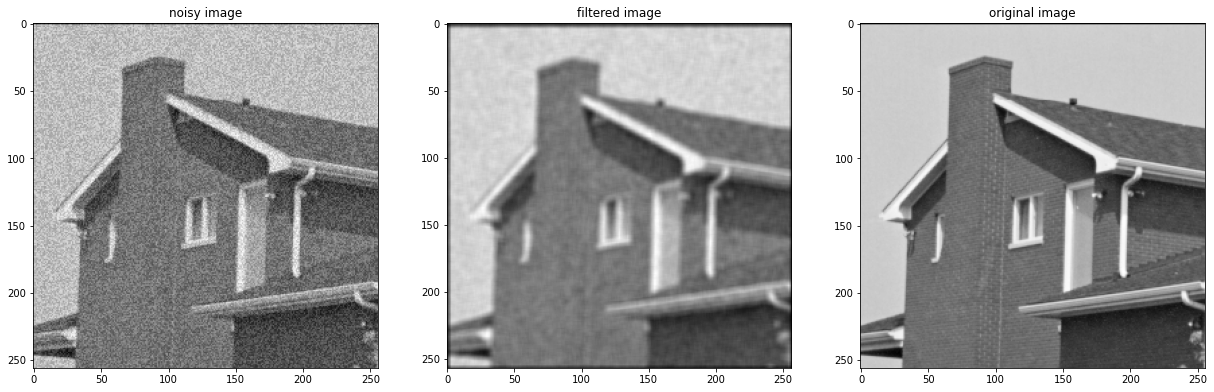

In [ ]:
def add_gaussian_noise(img_in,sigma_noise = 0.05):
  #np.random.rand creates random samples following a gaussian pdf
  gaussian_noise = sigma_noise*np.random.rand(np.shape(img_in)[0],np.shape(img_in)[1])
  img_out = img_in+gaussian_noise
  return img_out

noisy_image = add_gaussian_noise(img,75)

filtered_image = signal.convolve2d(noisy_image,larger_image ,mode="valid")

## display the noisy image, the filtered image and the original image
fig, axs = plt.subplots(1, 3, figsize=(21,15))
axs[0].imshow(noisy_image, cmap='gray')
axs[0].set_title("noisy image")
axs[1].imshow(abs(filtered_image), cmap='gray')
axs[1].set_title("filtered image")
axs[2].imshow(img, cmap='gray')
axs[2].set_title("original image")
plt.show()

**Q :** Does this low pass filtering reduce the influence of the noise? Could you think of another kernel to apply a low pass filter?

**Answer :**  Yes, it reduces the noise. We could use a smaller Kernel, as $\frac{1}{9}*1_{(3,3)}$, which would blur less the final image, but it would not eliminate as much noise as we got from the previous filter. Or we could use another kind of filter and use a median filter.

**Q :** How are the edges affected by this filtering ? Do you think that a median filter would be better?

**Answer :** Edges are blured. I do think that a median filter would do better, as it would not blur the image so much.

**Q :** Another interesting application of the low pass filtering is subsampling. In the following cell, implement a subsampling with and without low pass filtering (as we did in the previous section) and comment on the results. Is the result any better ? Are the artifacts corrected?

**Answer :** In the filtered subsample we can't observe the stripes in the image, so it corrected the problem we had before. However, the filtrated one is blurrier than the original subsample, what is expected given that our image pre-subsampling was already blurry.


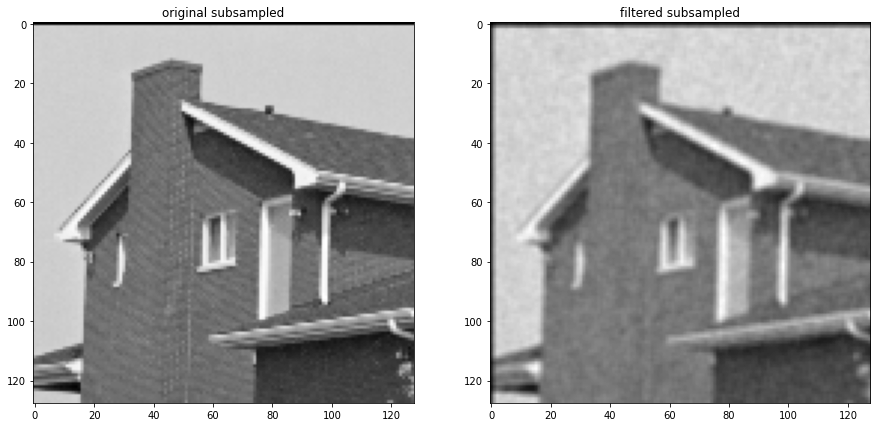

In [ ]:
img_filtered_subsampled=filtered_image[0:nlines:2,0:ncolumns:2]

##visualize the two images
fig, axs = plt.subplots(1,2, figsize=(15,15))
axs[0].imshow(img_subsampled, cmap='gray')
axs[0].set_title("original subsampled")
axs[1].imshow(img_filtered_subsampled, cmap='gray')
axs[1].set_title("filtered subsampled")
plt.show()



### High pass Filtering

###Contour detection with Prewitt filtering

A simple way to detect contours in images is to apply a high pass filter to our image. In this section we will implement a simple Prewitt filter.

The Prewitt filter convolves the kernel  $K = \begin{pmatrix}
-1 & 0 & 1\\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{pmatrix} $ to the image for the horizontal filtering, and its transpose for the vertical filtering. The filtering formula is the following :  $$ y = \frac{1}{2}(K*x + K^T*x).$$
Let's implement this filter and visualize it's results.

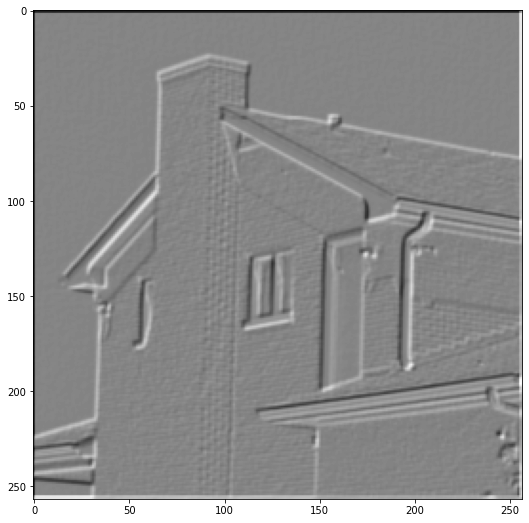

In [ ]:
def prewitt_filtering(img):
  kernel = [[-1,0,1],[-1,0,1],[-1,0,1]]
  larger_image = np.zeros((512,512))
  larger_image[254:257,254:257] = kernel
  img_filtered_hor = signal.convolve2d(img,larger_image ,mode="valid")
  img_filtered_ver = signal.convolve2d(img,larger_image.transpose() ,mode="valid")
  img_filtered = (img_filtered_hor+img_filtered_ver)/2
  return(img_filtered)

filtered_img = prewitt_filtering(img)

plt.imshow(filtered_img, cmap = "gray")
plt.show()

**Q :** What is the effect of this filter on the image ?

**Answer :** We highlight the borders/contours from the original image, while the rest of the image is greyed.
